In [3]:
import numpy as np
import scipy.constants as scc
from matplotlib import pyplot as plt
import numpy as np
import scipy.constants as scc
import pandas as pd 
from IPython.display import display
from PIL import Image


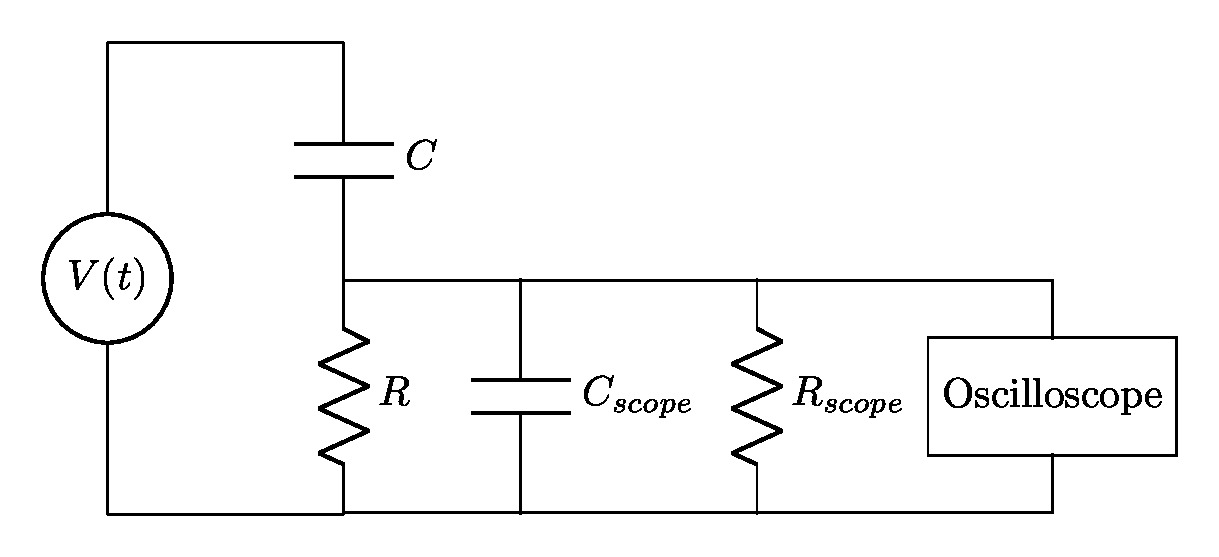

In [4]:
image = Image.open("Series_RC_circuit_picture.jpeg")  # No need for a full path
display(image)

# Circuit Impedence

The circuit consists of two impedences.  The capacitor, $X = \frac{-i}{\omega C}$ and the three components in parallel, $R$, $C_s$ and $R_s$, which we can call $Z_p$.  
for the rule for adding impedence in parallel, we have

$$
\frac{1}{Z_p} = \frac{1}{R} + \frac{1}{R_s}  + i\omega C_s
$$

We can refer to the real and imaginary parts of $Z_p$ as

$$
Z_p = r + i x
$$

---

# Analysis of load resistor voltage $V_R$

The voltage across the load resistor is given by the voltage divider formula with $V_0$ the input voltage.

$$
V_R = V_0 \frac{Z_p}{X_c + Z_p}
$$

If we define 

$$
A = \left|\frac{V_R}{V_0}\right|
$$

Then 

$$
A = \left| \frac{Z_p}{X_c + Z_p}\right|
$$

---

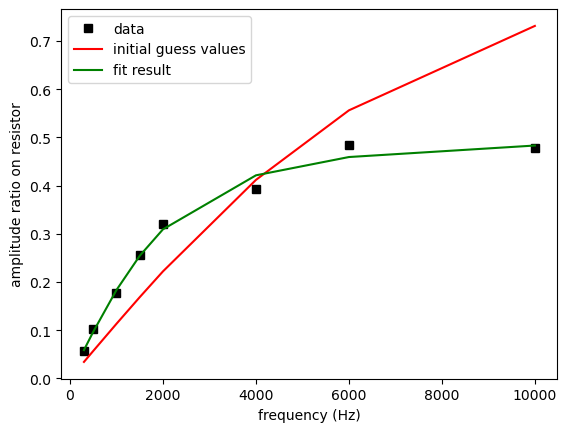

[[Model]]
    Model(amplitude)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 8
    # variables        = 2
    chi-square         = 0.00167345
    reduced chi-square = 2.7891e-04
    Akaike info crit   = -63.7784836
    Bayesian info crit = -63.6196005
    R-squared          = 0.99108218
[[Variables]]
    C:   3.4550e-11 +/- 1.8228e-12 (5.28%) (init = 2e-11)
    R:   1000000 (fixed)
    Rs:  1e+07 (fixed)
    Cs:  3.4760e-11 +/- 3.2176e-12 (9.26%) (init = 1e-12)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, Cs) = +0.8508


In [54]:
# now write as python function
import numpy as np
import scipy.constants as scc

def amplitude(w,C,R,Rs,Cs):
    '''
    w = angular frequence
    C = Capacitor value
    R = Resistor value
    Rs = Scope impedence
    Cs = Scope capacitance
    '''
    Zp  = 1/(1/Rs + 1/R +1j*w*Cs)
    Xc = -1j/w/C 
    A = np.abs(Zp/(Xc + Zp))
    return(A)
# turn function into a fitting model using lmfit library 
import lmfit 
amplitude_model = lmfit.Model(amplitude)
params = amplitude_model.make_params(C = 20*scc.pico, \
    R = 1*scc.mega, Rs = 10*scc.mega, Cs = 1*scc.pico)
params["C"].vary = True
params["R"].vary = False
params["Rs"].vary = False
params["Cs"].vary = True
# input data
from matplotlib import pyplot as plt
w = np.array([.3,.5,1,1.5,2,4,6,10])*scc.kilo*2*np.pi
Am = np.array([56.5,103.5,176.6,255.8,320.8,393.5,484.5,477.5])/scc.kilo
plt.plot(w/2/scc.pi,Am,'ks',label="data")
ysim = amplitude_model.eval(params=params,w=w)
plt.plot(w/2/scc.pi,ysim,'-r',label="initial guess values")
result = amplitude_model.fit(Am,params,w=w)
yfit = result.eval(w=w)
plt.plot(w/2/scc.pi,yfit,'-g',label="fit result")
plt.legend()
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude ratio on resistor')
plt.show()
print(result.fit_report())